# Notebook for analyzing DHFR torsion angles

step 1:    
step 2:
step 3:
step 4:

In [1]:
import sys
import os
sys.path.append(os.path.expanduser("~/Dropbox/KcsA/scripts"))
from script_module import *


# load data
data_path='/Users/yunyao_1/Dropbox/KcsA/DHFR_Analysis/DHFR_torsion.csv'


In [2]:
# calculate intra-residue correlation 
from torsion_analysis_module import TorsionAnalyzer
DHFR_analyzer = TorsionAnalyzer(data_path, adjusted_residue_index=False)

# Calculate intra-residue correlations
intra_correlation = DHFR_analyzer.calculate_intra_residue_correlation()
print("Intra-residue Correlations (φ(i) vs ψ(i)):")
for residue, correlation in intra_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

#DHFR_analyzer.data

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/data/filenames.py:110: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


Intra-residue Correlations (φ(i) vs ψ(i)):
Residue A:1: nan
Residue A:2: -0.162
Residue A:3: -0.067
Residue A:4: 0.162
Residue A:5: 0.094
Residue A:6: -0.003
Residue A:7: 0.007
Residue A:8: -0.062
Residue A:9: 0.107
Residue A:10: -0.390
Residue A:11: -0.484
Residue A:12: -0.351
Residue A:13: -0.231
Residue A:14: -0.001
Residue A:15: -0.119
Residue A:16: 0.239
Residue A:17: -0.265
Residue A:18: -0.362
Residue A:19: 0.012
Residue A:20: -0.717
Residue A:21: -0.444
Residue A:22: -0.168
Residue A:23: 0.481
Residue A:24: 0.199
Residue A:25: -0.550
Residue A:26: -0.471
Residue A:27: -0.351
Residue A:28: -0.444
Residue A:29: -0.373
Residue A:30: -0.427
Residue A:31: -0.396
Residue A:32: -0.500
Residue A:33: -0.333
Residue A:34: -0.374
Residue A:35: -0.269
Residue A:36: -0.533
Residue A:37: -0.483
Residue A:38: 0.036
Residue A:39: -0.162
Residue A:40: 0.099
Residue A:41: 0.056
Residue A:42: 0.110
Residue A:43: 0.070
Residue A:44: -0.453
Residue A:45: -0.426
Residue A:46: -0.412
Residue A:47: -0

In [3]:
#calculate inter-residue correlation
inter_correlation = DHFR_analyzer.calculate_inter_residue_correlation()
print("Inter-residue Correlations (φ(i+1) vs ψ(i)):")
for residue, correlation in inter_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Inter-residue Correlations (φ(i+1) vs ψ(i)):
Residue A:1: 0.028
Residue A:2: -0.740
Residue A:3: -0.335
Residue A:4: -0.729
Residue A:5: -0.616
Residue A:6: 0.112
Residue A:7: -0.766
Residue A:8: -0.499
Residue A:9: 0.320
Residue A:10: -0.453
Residue A:11: -0.412
Residue A:12: -0.765
Residue A:13: -0.537
Residue A:14: -0.261
Residue A:15: 0.237
Residue A:16: -0.361
Residue A:17: -0.842
Residue A:18: -0.190
Residue A:19: 0.034
Residue A:20: -0.165
Residue A:21: -0.548
Residue A:22: -0.307
Residue A:23: -0.699
Residue A:24: -0.302
Residue A:25: -0.202
Residue A:26: -0.532
Residue A:27: -0.542
Residue A:28: -0.603
Residue A:29: -0.617
Residue A:30: -0.551
Residue A:31: -0.498
Residue A:32: -0.627
Residue A:33: -0.607
Residue A:34: -0.749
Residue A:35: -0.467
Residue A:36: -0.072
Residue A:37: -0.809
Residue A:38: -0.531
Residue A:39: -0.753
Residue A:40: -0.820
Residue A:41: -0.725
Residue A:42: 0.499
Residue A:43: 0.403
Residue A:44: -0.311
Residue A:45: -0.487
Residue A:46: -0.483
Resid

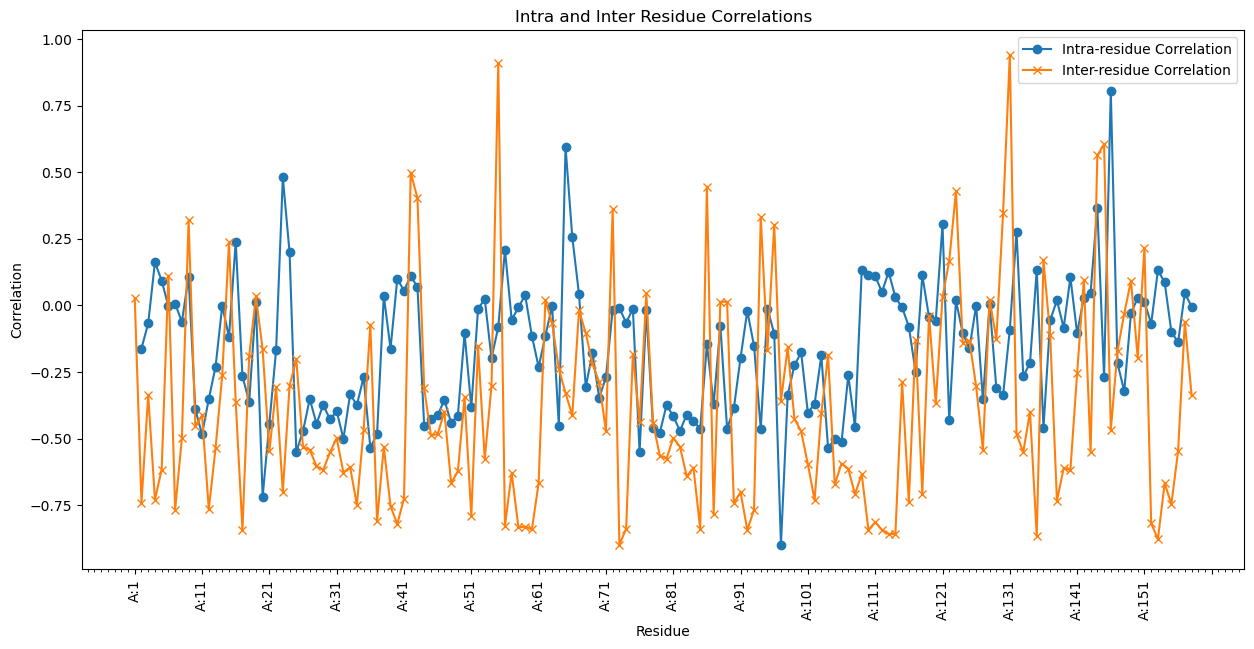

In [4]:
#plot the correlation
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Extract residues and their corresponding correlations
residues = list(intra_correlation.keys())
intra_values = list(intra_correlation.values())
inter_values = list(inter_correlation.values())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Plot intra-residue correlations
ax.plot(residues, intra_values, label='Intra-residue Correlation', marker='o')

# Plot inter-residue correlations
ax.plot(residues[:-1], inter_values, label='Inter-residue Correlation', marker='x')


# Set labels and title
ax.set_xlabel('Residue')
ax.set_ylabel('Correlation')
ax.set_title('Intra and Inter Residue Correlations')
ax.legend()

# Set up major and minor tickers
major_locator = MultipleLocator(10)  # Adjust to the desired spacing of major ticks
minor_locator = MultipleLocator(1)   # Adjust to the desired spacing of minor ticks

ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)

# Rotate x-axis labels for better readability and only show for major ticks
ax.tick_params(axis='x', which='major', labelrotation=90)
ax.tick_params(axis='x', which='minor', labelbottom=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.show()

In [5]:
%%writefile plot_Ramachandran_latest_no_dependence.py

# functions can be used independently
# according fucntions have been incoporated into TorsionAnaylzer class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Ramachandran
import os
from math import ceil


def plot_ramachandran(residue_index, PDB_code, chain, analyzer, ax):
    """
    Plots the Ramachandran plot for a given residue and chain on the provided axis.
    
    Parameters:
        residue_index (int): Residue index.
        PDB_code (str): PDB code.
        chain (str): Chain identifier.
        analyzer: Data analyzer object containing torsion angle data.
        ax (matplotlib.axes.Axes): Axis on which to plot.
    """
    import MDAnalysis as mda
    from MDAnalysis.analysis.dihedrals import Ramachandran

    # Download and load the PDB file if not present
    pdb_file = f"{PDB_code}.pdb"
    if not os.path.exists(pdb_file):
        url = f"https://files.rcsb.org/download/{PDB_code}.pdb"
        urllib.request.urlretrieve(url, pdb_file)

    # Load the structure
    u = mda.Universe(pdb_file)

    # Select the residue
    selection = f"resid {residue_index} and segid {chain}"
    atoms = u.select_atoms(selection)

    if atoms.n_atoms == 0:
        print(f"Residue {residue_index} not found in chain {chain}")
        return

    # Perform Ramachandran analysis
    R = Ramachandran(atoms).run()
    R.plot(ax=ax, color='black', ref=True)

    # Scatter plot φ and ψ angles for each chain
    psi_col = f"{chain}:{residue_index}-psi"
    phi_col = f"{chain}:{residue_index}-phi"
    if psi_col in analyzer.data.columns and phi_col in analyzer.data.columns:
        ax.scatter(
            analyzer.data[phi_col], analyzer.data[psi_col],
            color='red', alpha=0.6, linewidth=2, marker='o', label=f'Chain {chain}'
        )
    ax.set_title(f"Ramachandran Plot: Residue {residue_index}, Chain {chain}")
    ax.legend()


def plot_all_ramachandran(residue_indices, PDB_code, chains, analyzer=None, output_dir='plots'):
    """
    Generate and arrange Ramachandran plots for all specified residues and chains in a single figure.
    
    Parameters:
        residue_indices (list): List of residue indices to plot.
        PDB_code (str): PDB code of the structure.
        chains (list): List of chain identifiers.
        analyzer: Data analyzer object containing torsion angle data (optional).
        output_dir (str): Directory to save the output plot.
    """
    # Determine number of subplots and layout
    num_plots = len(residue_indices) * len(chains)
    cols = 3  # Define number of columns
    rows = ceil(num_plots / cols)
    
    fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axs = axs.flatten()  # Flatten to iterate easily if multiple rows
    
    plot_idx = 0
    for chain in chains:
        for residue_index in residue_indices:
            if plot_idx < len(axs):
                ax = axs[plot_idx]
                try:
                    # Call the Ramachandran plot function with the current axis
                    plot_ramachandran(
                        residue_index=residue_index,
                        PDB_code=PDB_code,
                        chain=chain,
                        analyzer=analyzer,
                        ax=ax
                    )
                except Exception as e:
                    print(f"Error plotting residue {residue_index} in chain {chain}: {e}")
                plot_idx += 1

    # Hide unused subplots
    for i in range(plot_idx, len(axs)):
        fig.delaxes(axs[i])

    # Save and display the combined figure
    plt.tight_layout()
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file = f"{output_dir}/Combined_Ramachandran_{PDB_code}.png"
    plt.savefig(output_file)
    print(f"Combined plot saved as {output_file}")
    plt.show()


Overwriting plot_Ramachandran_latest_no_dependence.py


/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Combined plot saved as DHFR_Rama_plots2/Combined_Ramachandran_1rx1.png


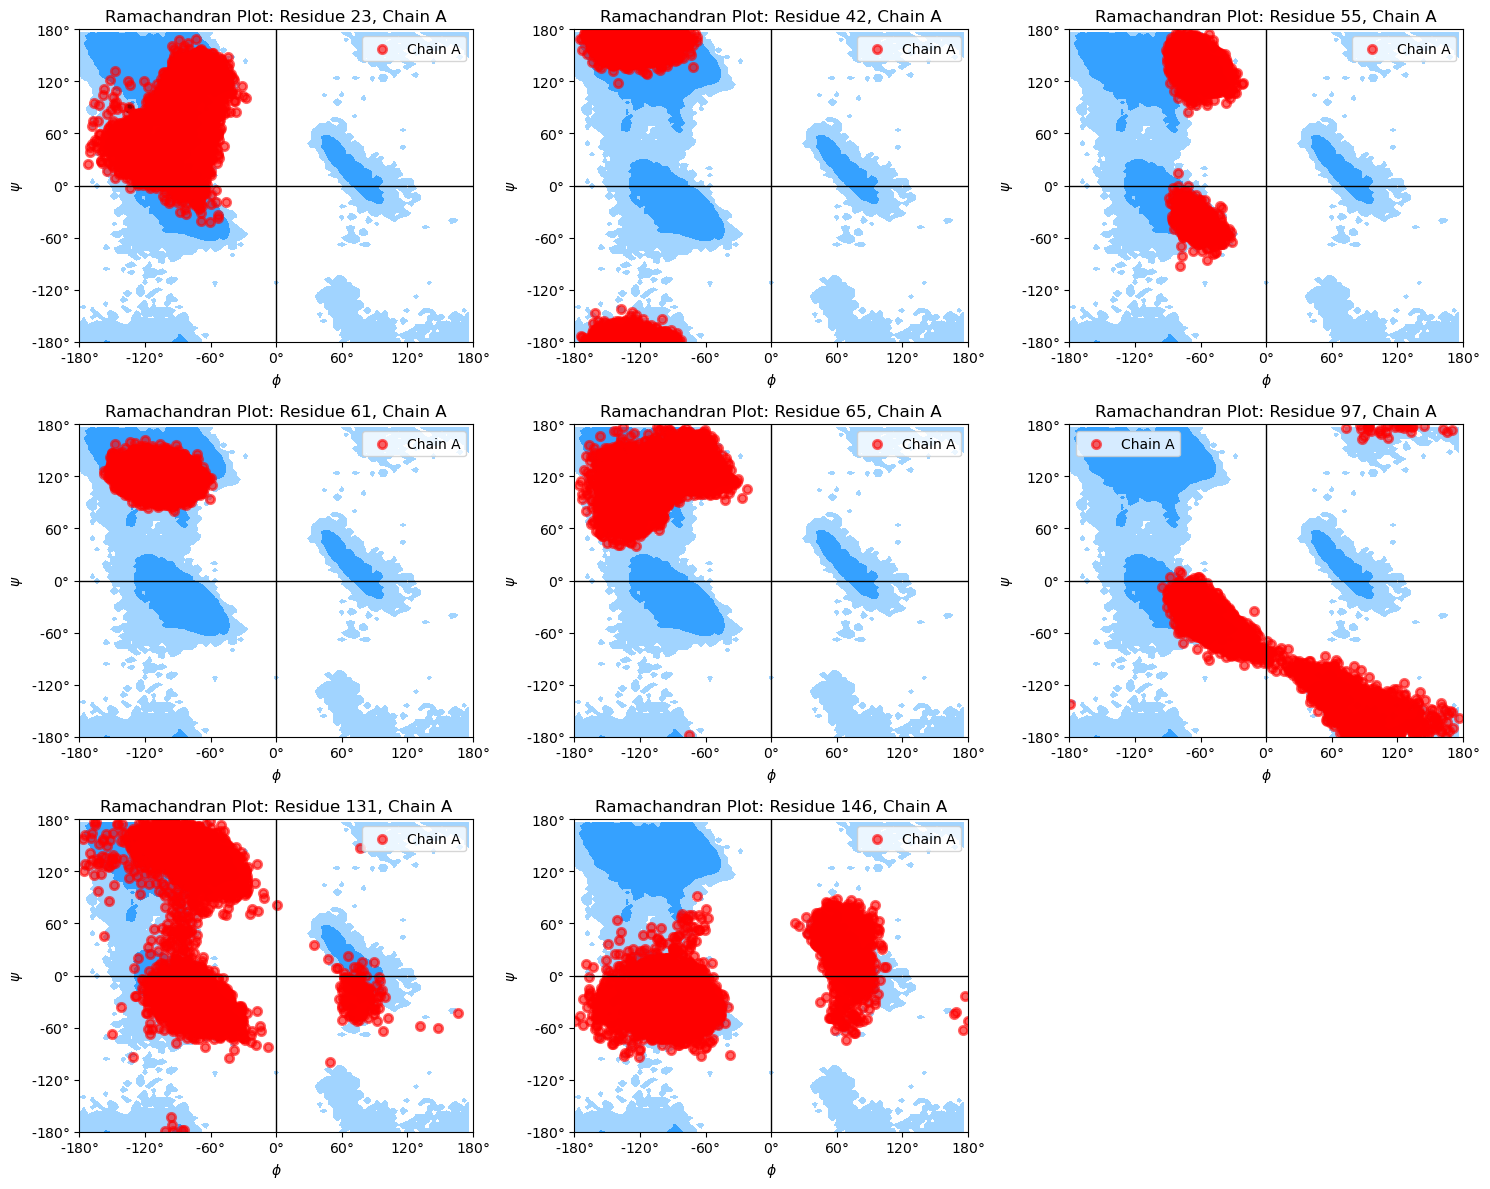

In [6]:
# plot residue torsion angles over Ramachandran plot
residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
chains=['A']
#DHFR_analyzer.plot_ramachandran(residue_index='23', PDB_code='1rx1', chain='A', output_dir='DHFR_Rama_plots2') 
DHFR_analyzer.plot_all_ramachandran(residue_indices=residues_to_plot, PDB_code='1rx1', chains=chains, output_dir='DHFR_Rama_plots2')

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_23.png


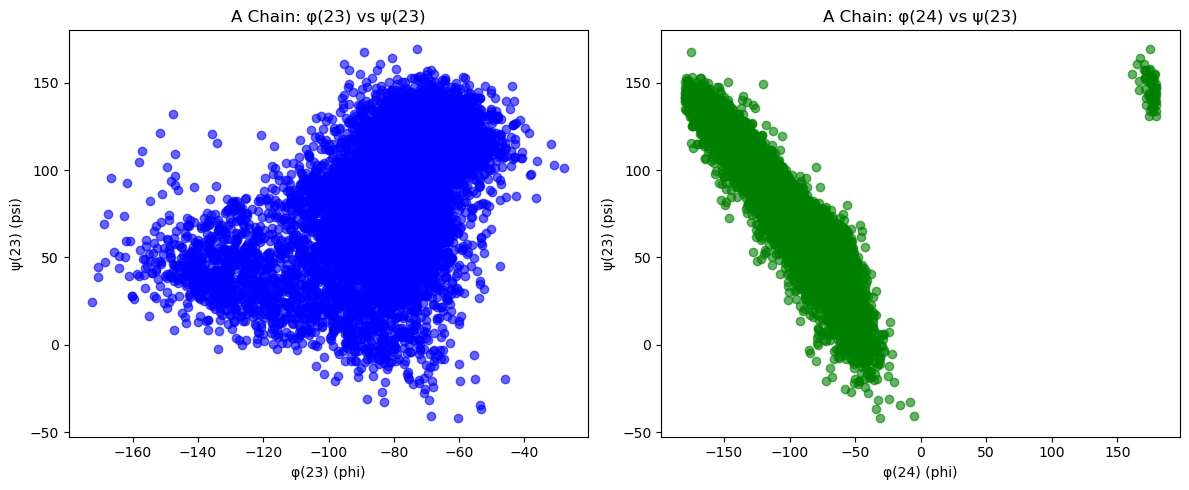

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_42.png


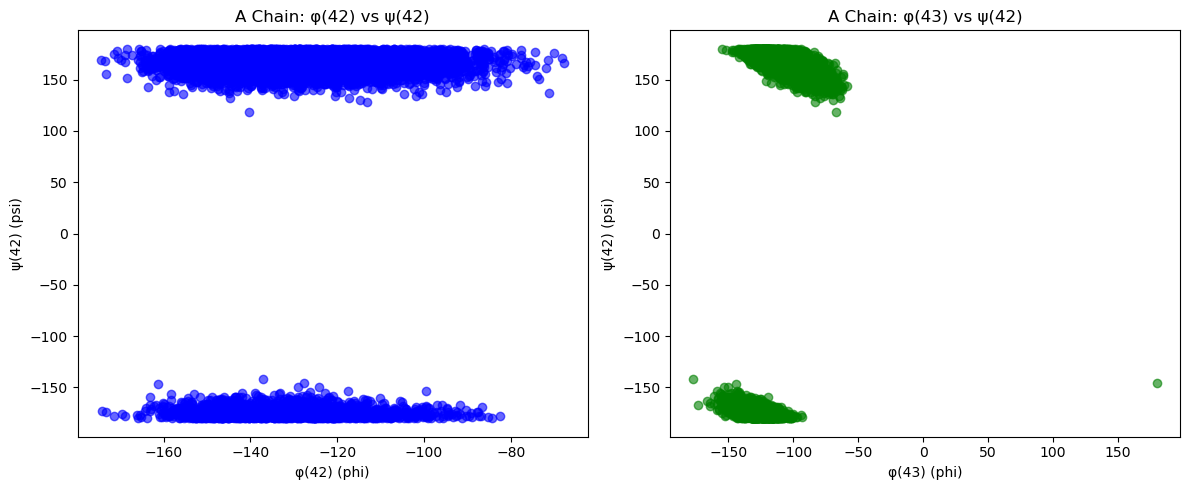

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_55.png


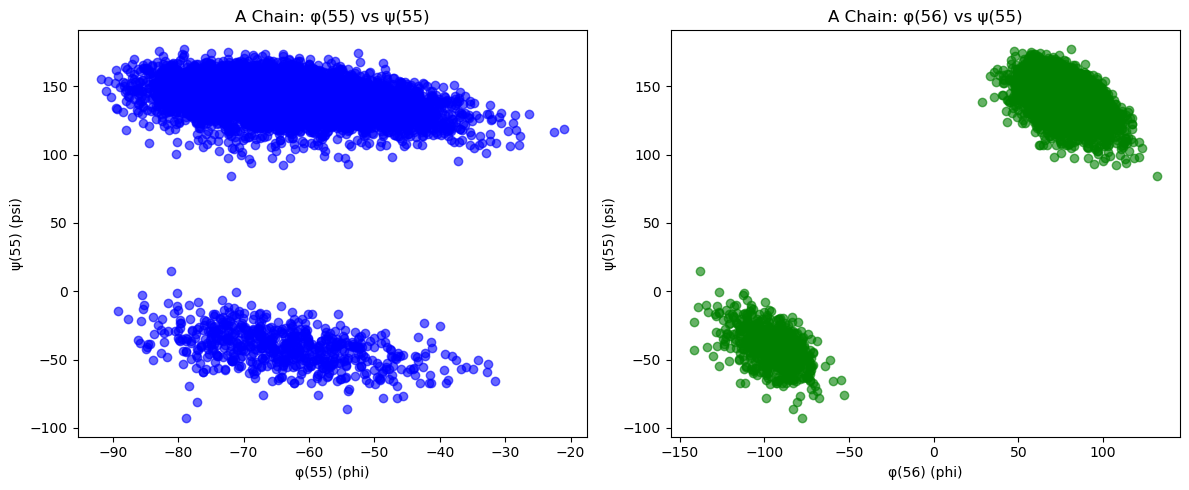

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_61.png


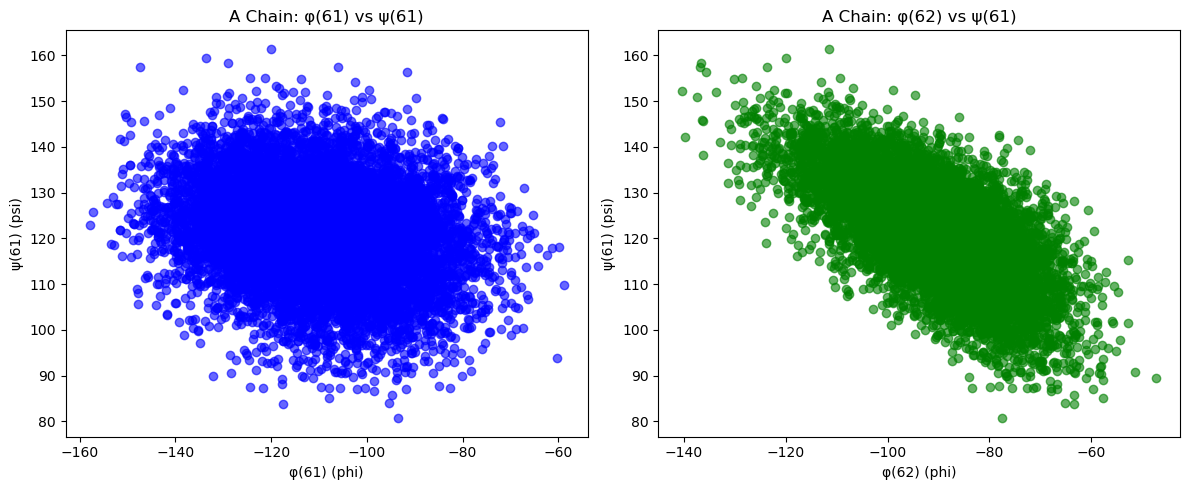

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_65.png


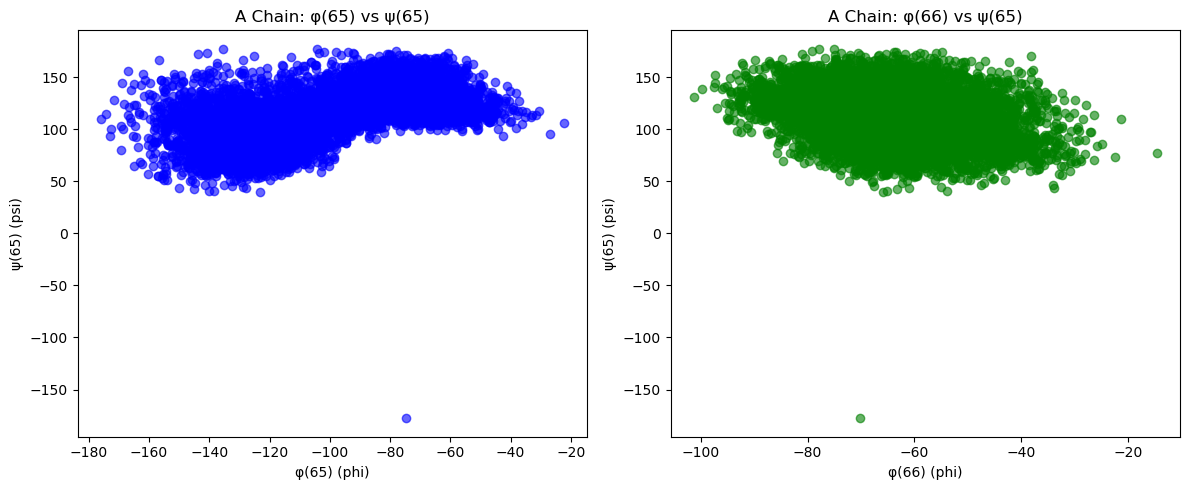

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_97.png


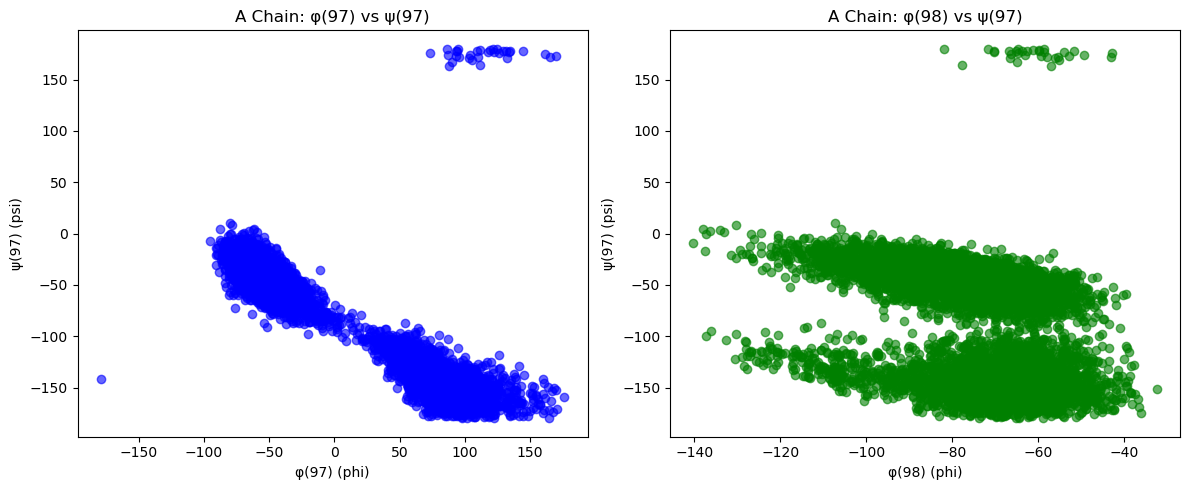

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_131.png


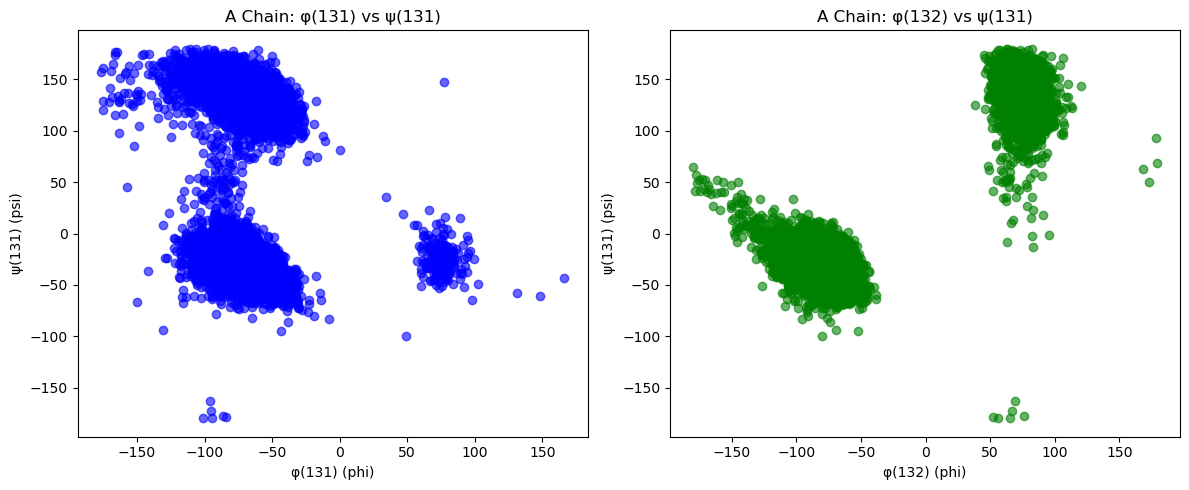

Combined plot saved as DHFR_scatter_plots/inter_intra_torsion_scatter_146.png


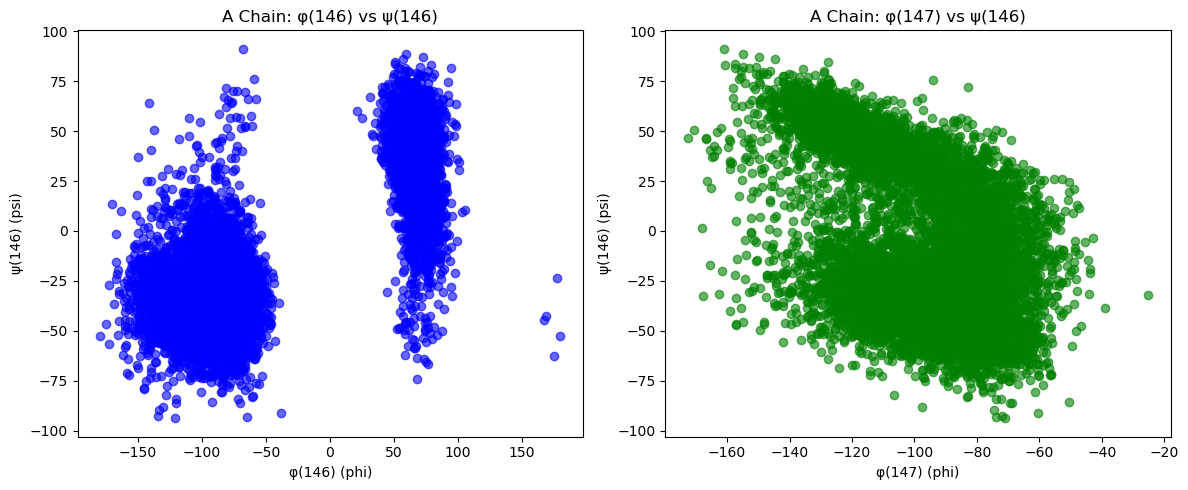

In [7]:
# plot inter and intra residue correlation for ceratin residues

residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    DHFR_analyzer.plot_scatter(residue, chains=chains, output_dir='DHFR_scatter_plots')

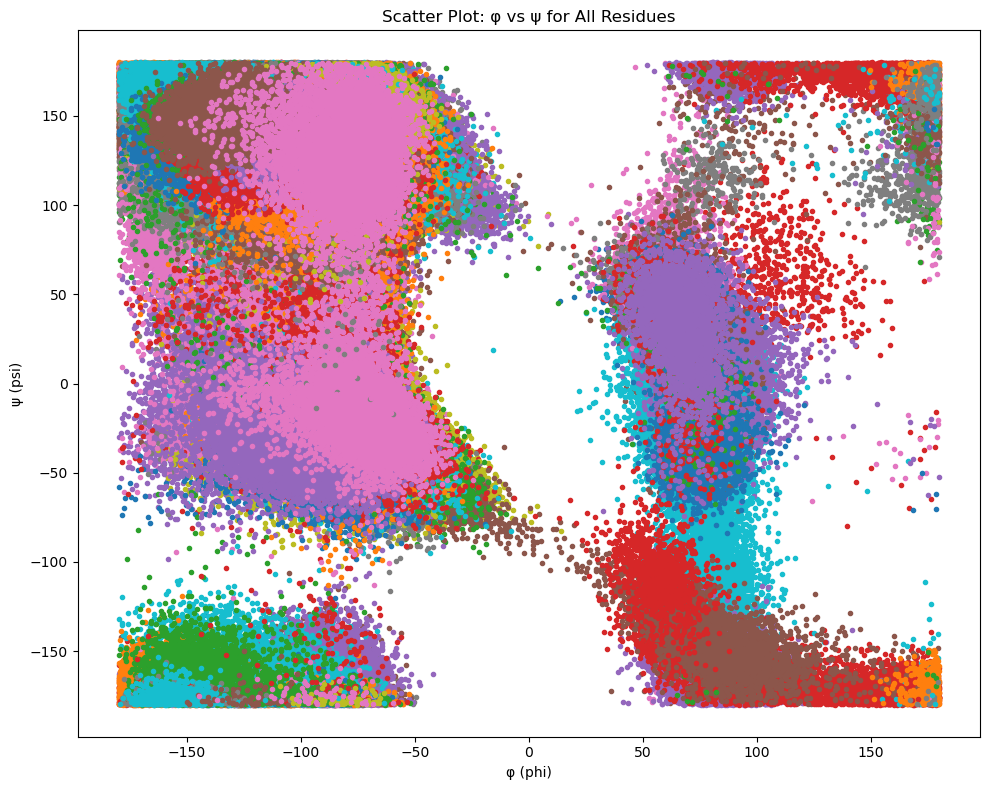

In [17]:
# plot torsion angles of all residues



import matplotlib.pyplot as plt

# Create a single figure for all residues
plt.figure(figsize=(10, 8))

# Plot torsion angles for all residues
for index in range(2, 159):
    phi_col = f'A:{index}-phi'
    psi_col = f'A:{index}-psi'

    # Ensure the columns exist in the DataFrame
    if phi_col in DHFR_analyzer.data.columns and psi_col in DHFR_analyzer.data.columns:
        # Convert to numpy arrays for plotting
        phi_data = DHFR_analyzer.data[phi_col].to_numpy()
        psi_data = DHFR_analyzer.data[psi_col].to_numpy()

        # Plot data
        plt.plot(
            phi_data, psi_data, 'o',
            markersize=3,  # Adjust marker size
            label=f'Residue {index}'
        )
    else:
        print(f"Columns {phi_col} or {psi_col} not found in the data.")

# Add labels, title, and legend
plt.xlabel("φ (phi)")
plt.ylabel("ψ (psi)")
plt.title("Scatter Plot: φ vs ψ for All Residues")
#plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()

# Show the combined plot
plt.show()


## Part II: construct metrics to characterize torsion angle change 

several observations:  
1. torsion angle correlation is secondary stucture dependent  
2. for helix, intermediate intra and inter correltaion (~ -0.5)
3. for sheet, weak intra correlation ~ 0, strong inter correlation ( ~ -0.7--0.9)
4. for coil, noisy data
5. within sheet, corelation patterns are differnt, maybe related to certain type of motion (strong-weak-strong-weak, vs, weak,strong, strong, strong, weak)

In [ ]:
# idea:  use PLM to predict torsion angle correlation